Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

Данные лежат на google диске по [ссылке](https://drive.google.com/file/d/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ/view?usp=sharing).

In [126]:
!wget 'https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ' -O WA_Fn-UseC_-Telco-Customer-Churn.csv

--2022-02-19 23:37:19--  https://drive.google.com/uc?export=download&id=1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ
Распознаётся drive.google.com (drive.google.com)... 64.233.161.194, 2a00:1450:4010:c01::c2
Подключение к drive.google.com (drive.google.com)|64.233.161.194|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 303 See Other
Адрес: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/41ultk9g0eflba7k3std4895a85ncpk1/1645302975000/14904333240138417226/*/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ?e=download [переход]
Предупреждение: в HTTP шаблоны не поддерживаются.
--2022-02-19 23:37:20--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/41ultk9g0eflba7k3std4895a85ncpk1/1645302975000/14904333240138417226/*/1g8lsZO25O2SxuCrIYVSDV3eLqmfC-TCZ?e=download
Распознаётся doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 64.233.162.132, 2a00:1450:4010:c05::84
Подключение к

In [127]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [128]:
m,f = df['gender'].value_counts()
print(f'm = {round((m/(m+f)*100),2)}% f = {round((f/(m+f)*100),2)}%')

m = 50.48% f = 49.52%


##### 2. Какое количество уникальных значений у поля InternetService?

In [129]:
df['InternetService'].nunique()

3

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [130]:
df['TotalCharges'][df['TotalCharges'] == ' '] = 0
df['TotalCharges'] = df['TotalCharges'].astype(float)
print(f"median = {df['TotalCharges'].median()}")
print(f"mean = {df['TotalCharges'].mean()}")
print(f"std = {df['TotalCharges'].std()}")

median = 1394.55
mean = 2279.7343035638223
std = 2266.7944696890213


<ipython-input-130-25b082b589cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'][df['TotalCharges'] == ' '] = 0


В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

строковый тип данных

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [131]:
df['PhoneService'][df['PhoneService'] == 'Yes'] = 1
df['PhoneService'][df['PhoneService'] == 'No'] = 0
df['PhoneService'].value_counts()

<ipython-input-131-b664f7657854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PhoneService'][df['PhoneService'] == 'Yes'] = 1
<ipython-input-131-b664f7657854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PhoneService'][df['PhoneService'] == 'No'] = 0


1    6361
0     682
Name: PhoneService, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

сделано выше

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [167]:
df['Churn'][df['Churn'] == 'Yes'] = 1
df['Churn'][df['Churn'] == 'No'] = 0
df['Churn'].value_counts()

<ipython-input-167-b76244eb692c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'][df['Churn'] == 'Yes'] = 1
<ipython-input-167-b76244eb692c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'][df['Churn'] == 'No'] = 0


0    5174
1    1869
Name: Churn, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [168]:
columns = ['StreamingMovies','StreamingTV','TechSupport']
for column in columns:
    df[column][df[column] == 'Yes'] = 1
    df[column][df[column] == 'No'] = 0
    df[column][df[column] == 'No internet service'] = 0

<ipython-input-168-edbe745c14b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] == 'Yes'] = 1
<ipython-input-168-edbe745c14b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] == 'No'] = 0
<ipython-input-168-edbe745c14b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][df[column] == 'No internet service'] = 0


##### 8. Заполните пропуски в поле PhoneService значением 0

In [169]:
df['PhoneService'] = df['PhoneService'].fillna(0)
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

##### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [170]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


##### 9. Разделите датасет на тренировочную и тестовую выборку.

In [171]:
from sklearn.model_selection import train_test_split
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=42)


##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [172]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
     ('Selector', ColumnSelector('gender')), 
     ('OHEEncoder', OHEEncoder('gender'))])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [173]:
gender.fit_transform(X_train, y = None)

,gender_Female,gender_Male
6607,0,1
2598,1,0
2345,1,0
4093,1,0
693,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?
когда большой разброс данных

In [174]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [175]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])


Объединение всех "кубиков" очень легко сделать таким образом

In [176]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [177]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [179]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features', feats),
    ('classifier', RandomForestClassifier(random_state=42)),
])
y_train = y_train.astype('int')
pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [203]:
predict = pipeline.predict_proba(X_test)

##### 15. Посчитайте метрики качества получившейся модели (roc_auc)

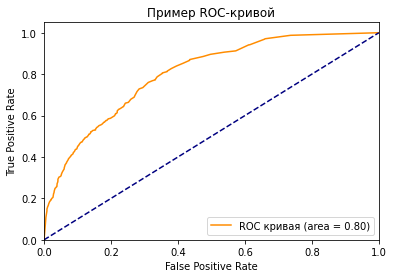

In [206]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

y_test = y_test.astype('int')
lr_auc = roc_auc_score(y_test, predict[:, 1])

# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, predict[:, 1])
roc_auc = auc(fpr, tpr)

# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

### Сохраним наш пайплайн

In [208]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)